### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Local imports
import analysis_functions

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "emitt_scan_round_150_1500_higher_chroma"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                      
lhcb1 -60.0    -60.0    15.0 15.0 62.315 60.32 1.400000e+11            1.5       1.5       250.0               base_collider   
                                                                       1.6       1.6       250.0               base_collider   
                                                                       1.7       1.7       250.0               base_collider   
                                                                       1.8       1.8       250.0               base_collider   
                                                                       1.9       1.9       250.0               base_collider   
                                                                       2.0       2.0       250.0               base_collider   
                                                                       2.1       2.1       250.0               base_collider   
                                                                       2.2       2.2       250.0               base_collider   
                                                                       2.3       2.3       250.0               base_collider   
                                                                       2.4       2.4       250.0               base_collider   
                                                                       2.5       2.5       250.0               base_collider   
                                                                       2.6       2.6       250.0               base_collider   
                                                                       2.7       2.7       250.0               base_collider   
                                                                       2.8       2.8       250.0               base_collider   
                                                                       2.9       2.9       250.0               base_collider   
                                                                       3.0       3.0       250.0               base_collider   
                                                                       3.1       3.1       250.0               base_collider   
                                                                       3.2       3.2       250.0               base_collider   
                                                                       3.3       3.3       250.0               base_collider   
                                                                       3.4       3.4       250.0               base_collider   
                                                                       3.5       3.5       250.0               base_collider   
                                                                       3.6       3.6       250.0               base_collider   
                                                                       3.7       3.7       250.0               base_collider   
                                                                       3.8       3.8       250.0               base_collider   
                                                                       3.9       3.9       250.0               base_collider   
                                                                       4.0       4.0       250.0               base_collider   

                                                                                                           normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                                     
lhcb1 -60.0    -60.0    15.0 15.0 62.315 60.32 1.400000e+11            1.5       1.5       250.0                                      5.724   
                                                                       1.6       1.6       2

In [3]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

title = analysis_functions.get_title_from_conf(
    conf_mad,
    conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=True,
    CC=True,
    display_intensity=True,
    PU=True,
    display_xing=True,
    display_tune=True,
    ignore_lumi_1_5=False,
    display_chroma=True,
    display_emit = False
)

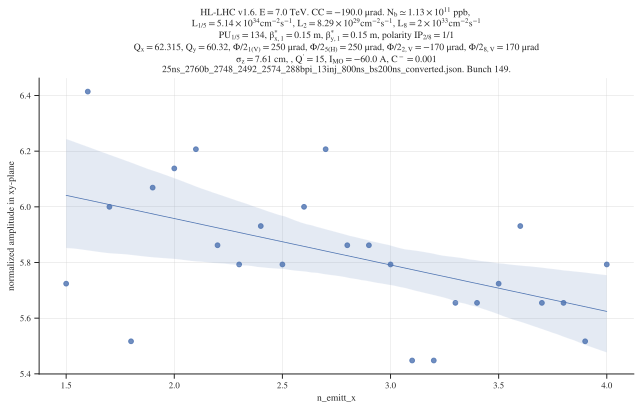

In [4]:
# Plot DA vs emittance, with linear regression
#sns.scatterplot(data=df, x="n_emitt_x", y="normalized amplitude in xy-plane")
sns.lmplot(data=df, x="n_emitt_x", y="normalized amplitude in xy-plane", height=6, aspect=1.5)
plt.title(title)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"plots/{STUDY_NAME}.pdf")
plt.show()